In [11]:
import sys
sys.path.append('..')

import operator
from string import punctuation

import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from peewee import SQL

from database.models import RawFacebookComments, RawTwitterComments, RawInstagramComments, RawYouTubeComments, RawHashtagComments

stpwords = stopwords.words('portuguese')
stpwords += [
    'acabar', 'achei', 'acho', 'acima', 'acinte', 'adrede', 'agora', 'ainda', 'algum', 'alguma', 'alguns', 'alguém', 'ana', 'antes', 'aqui', 'assim', 'bem', 'cara', 'certeza', 'chega', 'coisa', 'coisas', 'colocar', 'como', 'compartilhe', 'conheça', 'conosco', 'contigo', 'continue', 'dar', 'debalde', 'demais', 'dessa', 'desse', 'deu', 'deve', 'deveria', 'dino', 'disse', 'dizer', 'em', 'enquanto', 'então', 'estar', 'facebook', 'falando', 'falar', 'fale', 'falta', 'faz', 'fazendo', 'fazer', 'fez', 'fica', 'ficamos', 'ficar', 'ficou', 'forma', 'geral', 'gostaria', 'htps', 'jair', 'jeito', 'mal', 'maneira', 'meio', 'menos', 'mesma', 'mil', 'modo', 'mostra', 'mostrar', 'muita', 'nada', 'nao', 'neles', 'nessa', 'nesse', 'news', 'nome', 'nova', 'olá', 'onde', 'outra', 'outro', 'outros', 'parece', 'pode', 'podemos', 'pois', 'porque', 'porventura', 'poucos', 'pra', 'precisa', 'pro', 'qualquer', 'quanto', 'querem', 'queria', 'quero', 'realmente', 'sabe', 'saber', 'sei', 'sempre', 'ser', 'sim', 'sobre', 'talvez', 'ter', 'tirar', 'toa', 'toda', 'todas', 'todo', 'todos', 'tão', 'vai', 'vamos', 'vcs', 'vejo', 'vem', 'ver', 'vez', 'vou', 'vão'
]
stpwords += [
    'presidente', 'brasil', 'voto', 'votar', 'turno',
    'bolsonaro', 'hadad', 'ciro', 'geraldo', 'marina', 'alckmin', 'silva', 'gomes', 'jair'
]

In [12]:
def create_wordcloud(query, max_words=80):
    palavras = []
    for i, row in enumerate(query):
        palavras += [word for word in word_tokenize(row.clean_comment) if word not in stpwords]
    
    freq = FreqDist(palavras)    
    wordcloud = WordCloud(background_color="white", max_words=max_words).generate_from_frequencies(freq)

    plt.figure(figsize=(9, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def unique_users(query):
    users = dict()
    for i, row in enumerate(query):
        if row.username in users:
            users[row.username] += 1
        else:
            users[row.username] = 1
    users = sorted(users.items(), key=operator.itemgetter(1))
    users.reverse()
    return users

## Comentários no Facebook dos Candidatos

In [13]:
query = RawFacebookComments.select() \
        .where(SQL('length(clean_comment) > 0')) \
        .order_by(RawFacebookComments.hash)

Qtde de Comentários:  69437
Qtde de Usuários   :  42921


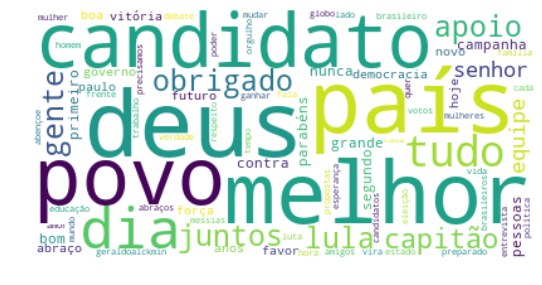

In [14]:
print('Qtde de Comentários: ', RawFacebookComments.select().count())
print('Qtde de Usuários   : ', len(unique_users(query)))
create_wordcloud(query)

## Comentários no Instagram dos Candidatos

In [15]:
query = RawInstagramComments.select() \
        .where(SQL('length(clean_comment) > 0')) \
        .order_by(RawInstagramComments.hash)

Qtde de Comentários:  42219
Qtde de Usuários:  23472


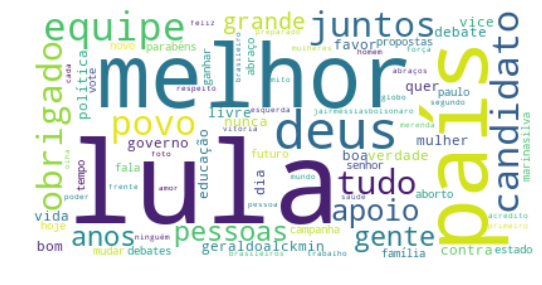

In [16]:
print('Qtde de Comentários: ', RawInstagramComments.select().count())
print('Qtde de Usuários: ', len(unique_users(query)))
create_wordcloud(query)

## Comentários no YouTube dos Candidatos

In [17]:
query = RawYouTubeComments.select() \
        .where(SQL('length(clean_comment) > 0')) \
        .order_by(RawYouTubeComments.hash)

Qtde de Comentários:  8698
Qtde de Usuários:  4992


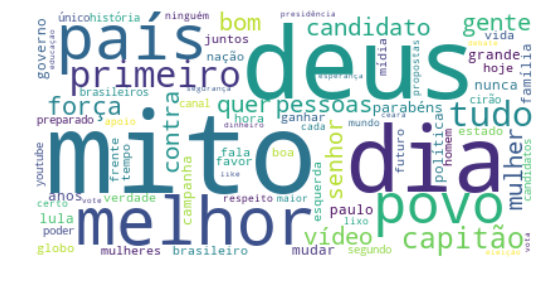

In [18]:
print('Qtde de Comentários: ', RawYouTubeComments.select().count())
print('Qtde de Usuários: ', len(unique_users(query)))
create_wordcloud(query)

## Comentários no Twitter dos Candidatos

In [19]:
query = RawTwitterComments.select() \
        .where(SQL('length(clean_comment) > 0')) \
        .order_by(RawTwitterComments.hash)

Qtde de Comentários:  128064
Qtde de Usuários:  48582


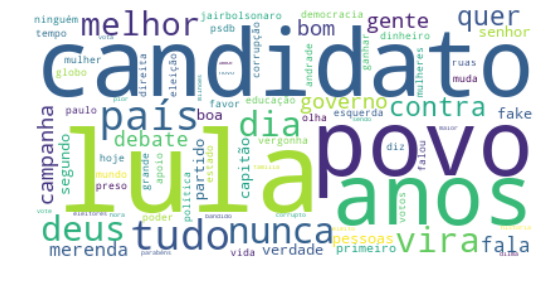

In [20]:
print('Qtde de Comentários: ', RawTwitterComments.select().count())
print('Qtde de Usuários: ', len(unique_users(query)))
create_wordcloud(query)